In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("champagne.csv")
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [4]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [5]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [7]:
df.set_index("Month", inplace = True)
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


# VISUALISE THE DATA 

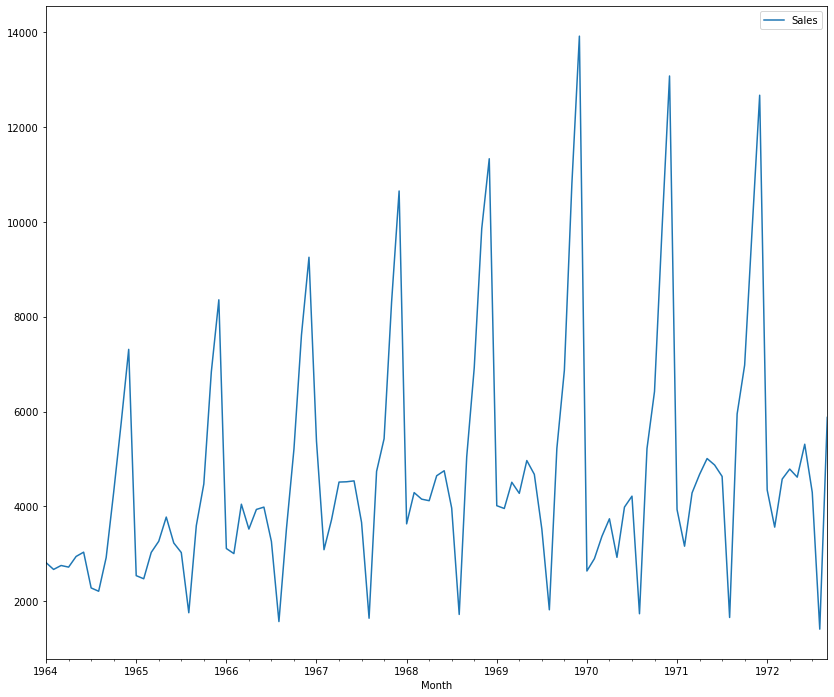

In [9]:
df.plot(figsize = (14,12))

From the graph we can clearly able to see the data is Seasonal so that using dickey fuller test we are going to test whether the data is seasonal or not by assuming
Alternate Hypothesis - Seasonal
Null Hypothesis - Not seasonal 
for that if p <= 0.05 then we need to reject alternate Hypothesis

In [13]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adfuller_test(test):
    results = adfuller(test)
    labels = ["ADA Statistics Result", " P-Value","Lags","No.of.Observtions"]
    
    for value,labels in zip(results, labels):
        print(labels+':'+ str(value))
    if results[1] < 0.05:
        print("there is a strong evidemce against the null Hypothesis so the data is stationary")
    else:
        print("there is a strong evidemce against the Alternate Hypothesis so the data is Not stationary")

In [22]:
adfuller_test(df['Sales'])

ADA Statistics Result:-1.8335930563276213
 P-Value:0.36391577166024586
Lags:11
No.of.Observtions:93
there is a strong evidemce against the Alternate Hypothesis so the data is Not stationary


In [29]:
df['Difference'] = df['Sales'] - df.Sales.shift(1)
df.head()

,Sales,Difference,Seasonal_difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN


Since from the graph we can clearly able to see that the data is seasonal about a year so we are going to consider the data from 12 months 

In [30]:
df['Seasonal_difference'] =df['Sales'] - df.Sales.shift(12)
df.head(14)

,Sales,Difference,Seasonal_difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [31]:
adfuller_test(df['Seasonal_difference'].dropna())

ADA Statistics Result:-7.626619157213163
 P-Value:2.060579696813685e-11
Lags:0
No.of.Observtions:92
there is a strong evidemce against the null Hypothesis so the data is stationary


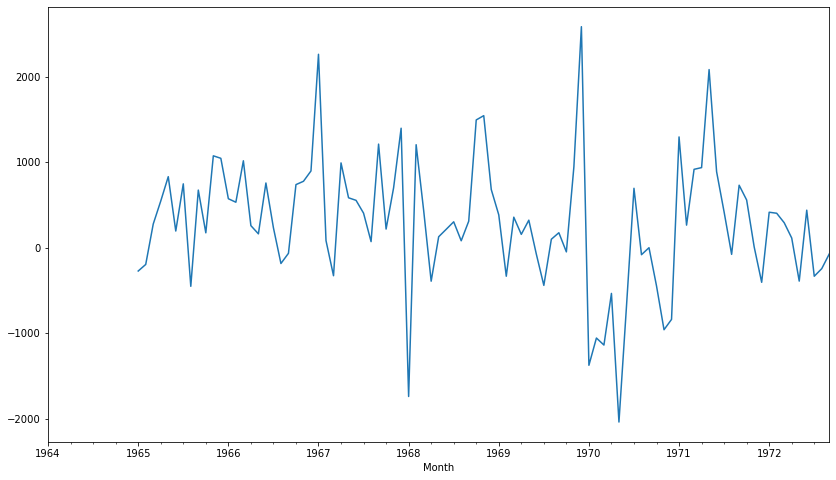

In [32]:
df.Seasonal_difference.plot(figsize = (14,8))

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

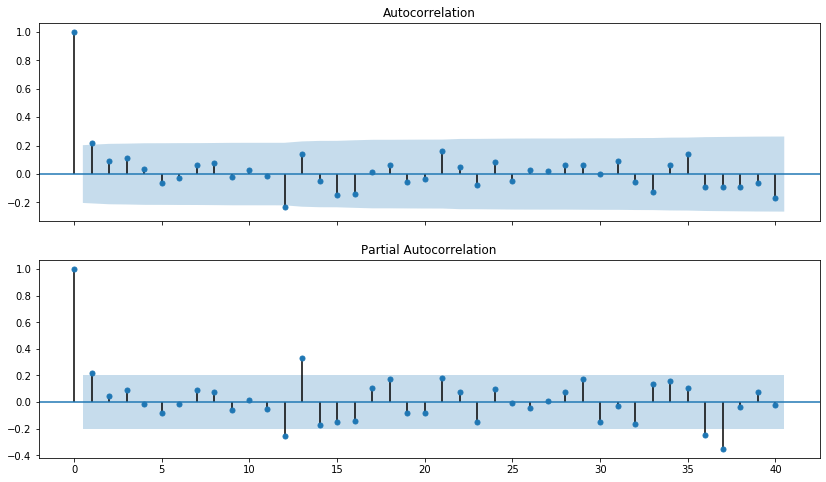

In [52]:
fig, ax = plt.subplots(2,1, sharex = True)
plot_acf(df['Seasonal_difference'].dropna(),lags = 40,ax = ax[0])
plot_pacf(df['Seasonal_difference'].dropna(),lags = 40,ax = ax[1])
plt.show()

In [53]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [54]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 19 Mar 2020   AIC                           1910.251
Time:                        19:55:38   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7842     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

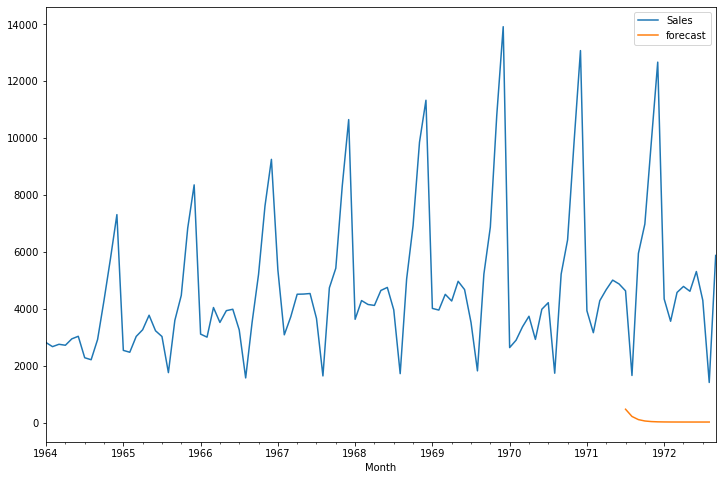

In [56]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [57]:
import statsmodels.api as sm

In [59]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


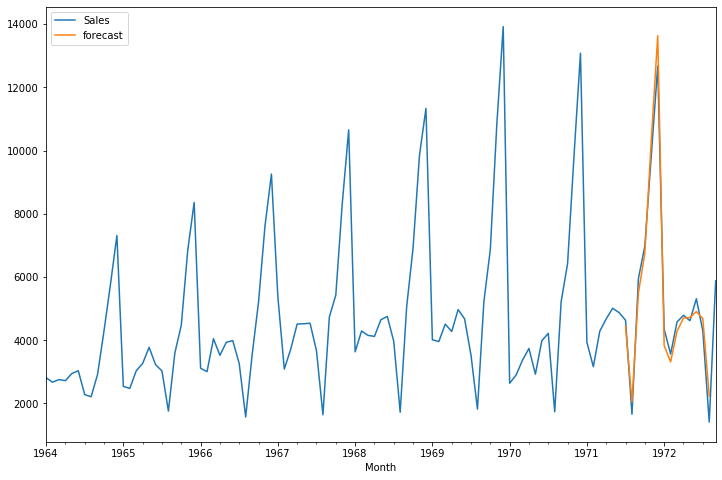

In [60]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))